# 0. import necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
from os import listdir
from os.path import isfile, join

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

from sklearn.preprocessing import label_binarize

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



# 1. load dataset

## from website

link: https://archive.ics.uci.edu/dataset/779/harth

In [2]:
general_file_path = "../data/harth/harth/"

In [3]:
specific_file_name = "S006.csv"

In [ ]:
# from os import listdir
# from os.path import isfile, join
onlyfiles = [f for f in listdir(general_file_path) if isfile(join(general_file_path, f))]

In [10]:
onlyfiles

['S006.csv',
 'S008.csv',
 'S009.csv',
 'S010.csv',
 'S012.csv',
 'S013.csv',
 'S014.csv',
 'S015.csv',
 'S016.csv',
 'S017.csv',
 'S018.csv',
 'S019.csv',
 'S020.csv',
 'S021.csv',
 'S022.csv',
 'S023.csv',
 'S024.csv',
 'S025.csv',
 'S026.csv',
 'S027.csv',
 'S028.csv',
 'S029.csv']

In [4]:
data = pd.read_csv(general_file_path+specific_file_name)

# 2. Data Exploration and Feature Engineering

In [5]:
data

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6
...,...,...,...,...,...,...,...,...
408704,2019-01-12 01:09:32.880,-0.690417,0.035710,-0.697054,0.228261,0.072950,0.985175,7
408705,2019-01-12 01:09:32.890,-0.745270,0.032438,-0.681320,-0.121986,0.063700,1.026665,7
408706,2019-01-12 01:09:32.900,-0.684827,0.037622,-0.703884,0.302960,0.076986,0.978313,7
408707,2019-01-12 01:09:32.910,-0.751518,0.028819,-0.668037,-0.241803,0.056675,1.026166,7


In [8]:
data.label.value_counts().sort_index()

label
1       24889
3       12693
4        1370
5        1550
6       62682
7      253029
8       13036
13      25040
14       3130
130     11290
Name: count, dtype: int64

In [12]:
data.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,408709.000000,408709.000000,408709.000000,408709.000000,408709.000000,408709.000000,408709.000000
mean,-0.802201,-0.000687,-0.274718,-0.370317,0.143471,0.617527,10.190187
std,0.238347,0.189062,0.441805,0.506666,0.213864,0.536430,20.328336
min,-3.542889,-3.016498,-1.024363,-6.844045,-5.757406,-4.884791,1.000000
25%,-0.983647,0.001063,-0.702338,-0.952840,0.022534,0.144114,6.000000
50%,-0.937195,0.033240,-0.277446,-0.277711,0.086248,0.924066,7.000000
75%,-0.654541,0.074822,0.064811,0.068999,0.246292,1.001372,7.000000
max,0.952109,2.569339,1.628023,3.898547,4.602909,5.391660,130.000000


## get features

In [16]:
features = data.drop(columns=["timestamp","label"], inplace=False)

## scale data

In [14]:
scaler = MinMaxScaler()

In [17]:
features_scaled = scaler.fit_transform(features)

In [38]:
features_scaled.min()

np.float64(0.0)

## label target column

In [ ]:

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.label)

## check class distribution

In [20]:
data.Activity.value_counts()

Activity
5    253029
4     62682
7     25040
0     24889
6     13036
1     12693
9     11290
8      3130
3      1550
2      1370
Name: count, dtype: int64

unbalanced classes noch behandeln!

nur jeweils 1000 samples nehmen?

In [105]:
data.Activity.value_counts().index

Index([5, 4, 7, 0, 6, 1, 9, 8, 3, 2], dtype='int64', name='Activity')

In [106]:
data.Activity.value_counts().values

array([253029,  62682,  25040,  24889,  13036,  12693,  11290,   3130,
         1550,   1370])

In [ ]:
df = data.Activity.value_counts().values

<Axes: xlabel='Activity', ylabel='count'>

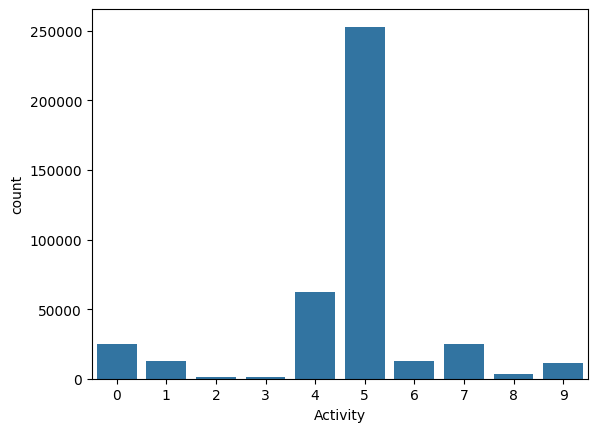

In [113]:
sns.barplot(data.Activity.value_counts())

([<matplotlib.patches.Wedge at 0x12b89e11f90>,
 [Text(-0.40202212771506357, 1.023903417724276, '5'),
  Text(-0.3675593033243409, -1.03677391872082, '4'),
  Text(0.3601790093108348, -1.039360900386322, '7'),
  Text(0.7231484633841837, -0.8288885931807084, '0'),
  Text(0.9308645905424676, -0.5860811497345776, '6'),
  Text(1.0278740469923782, -0.3917587823131862, '1'),
  Text(1.08226951829222, -0.19670457487187862, '9'),
  Text(1.0973863876669783, -0.07578335017152968, '8'),
  Text(1.099402010546884, -0.03626595104873348, '3'),
  Text(1.0999390126288706, -0.011583112579316799, '2')])

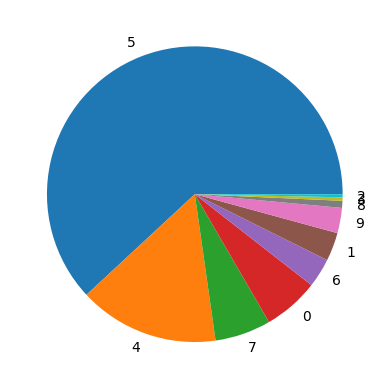

In [110]:
plt.pie(data.Activity.value_counts(), labels=data.Activity.value_counts().index)

In [21]:
target = data["Activity"]

In [68]:
target

0         4
1         4
2         4
3         4
4         4
         ..
408704    5
408705    5
408706    5
408707    5
408708    5
Name: Activity, Length: 408709, dtype: int64

## train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, stratify=target, random_state = 123)

# 3. Train models

## train lr model

In [ ]:

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [41]:
y_pred = lr.predict(X_test)

## train knn models

In [54]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
y_pred = knn_10.predict(X_test)

In [56]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [58]:
knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

## train svc

In [66]:
svc = SVC()

In [67]:
svc.fit(X_train, y_train.values.ravel())

SVC()

<Axes: >

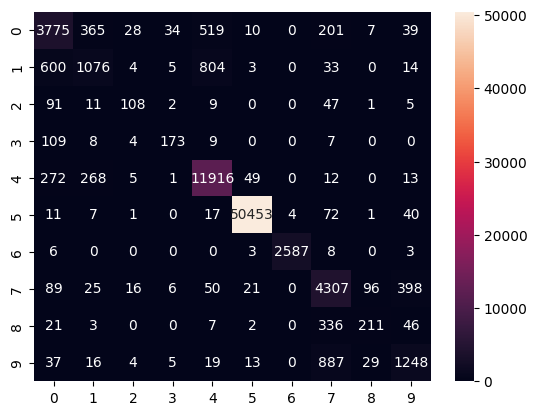

In [ ]:
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

# 4. Create results

In [69]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr','knn_5', 'knn_10', 'knn_15', 'knn_20', 'svc']
coeff_models = [lr, knn_5, knn_10, knn_15, knn_20, svc]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    # y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))

In [ ]:
y_pred = pd.concat(y_pred, axis=1)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [72]:
y_pred.head()

,lr,knn_5,knn_10,knn_15,knn_20,svc
0,5,5,5,5,5,5
1,4,4,4,4,4,4
2,5,5,5,5,5,5
3,5,5,5,5,5,5
4,5,5,5,5,5,5


In [73]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5,6,7,8,9]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

c:\Users\Jens\anaconda3\envs\env_01\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
metrics

,lr,knn_5,knn_10,knn_15,knn_20,svc
precision,0.780520,0.926359,0.924706,0.922874,0.922135,0.878589
recall,0.842235,0.929143,0.927968,0.926574,0.925815,0.881615
fscore,0.794509,0.926740,0.924697,0.922951,0.921861,0.856913
accuracy,0.842235,0.929143,0.927968,0.926574,0.925815,0.881615
auc,0.903295,0.960714,0.960017,0.959052,0.958606,0.931680


(0.6, 1.0)

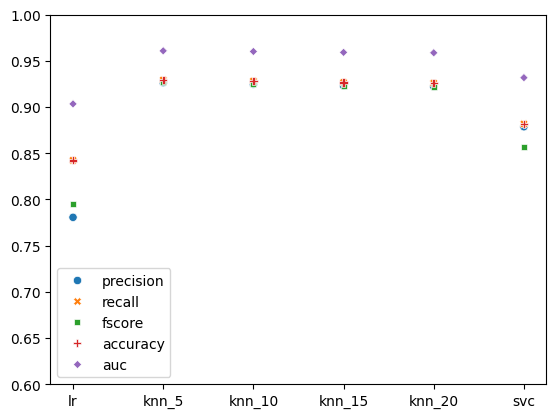

In [101]:
sns.scatterplot(metrics.T)
plt.ylim(0.6,1)

In [89]:
metrics.T

,precision,recall,fscore,accuracy,auc
lr,0.780520,0.842235,0.794509,0.842235,0.903295
knn_5,0.926359,0.929143,0.926740,0.929143,0.960714
knn_10,0.924706,0.927968,0.924697,0.927968,0.960017
knn_15,0.922874,0.926574,0.922951,0.926574,0.959052
knn_20,0.922135,0.925815,0.921861,0.925815,0.958606
svc,0.878589,0.881615,0.856913,0.881615,0.931680


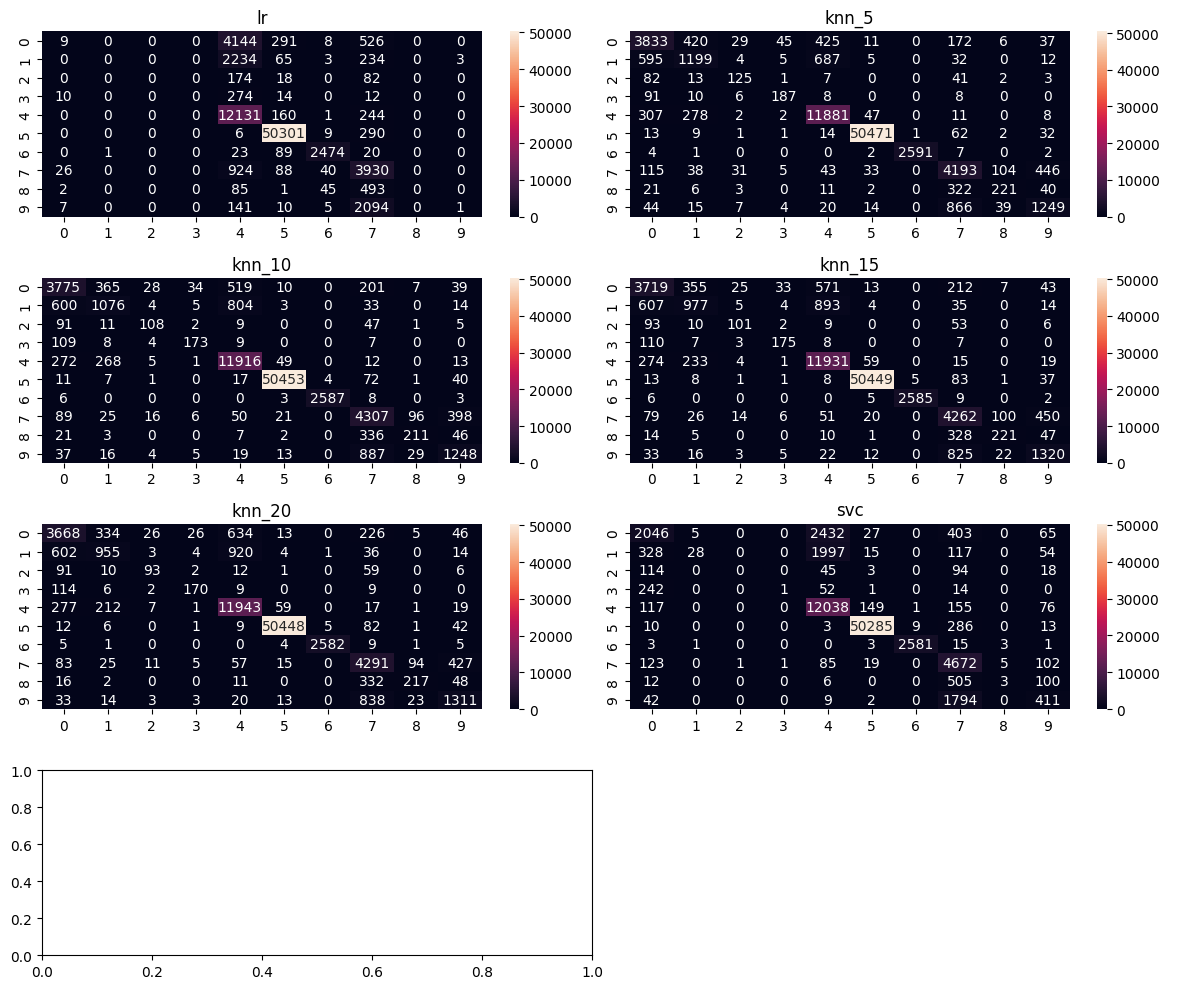

In [87]:
fig, axList = plt.subplots(nrows=4, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()